# Agate Technical Test Segment C - Study Case
by : Tito Tamaro <br>
Email : tito.tamaro2@gmail.com

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import warnings

# Import Data

In [2]:
df = pd.read_excel('Agate.xlsx')
df_aq = pd.read_excel('User Acquisition.xlsx')

# Cleaning Data

In [3]:
df = df.T # to make easier to process

In [4]:
header = df.iloc[0]
df = df[1:]
df.columns = header

In [5]:
df.head()

No,Date,New User,DAU,D1 Retention,D7 Retention,D30 Retention,Avg. Session,Playtime / Day (in minutes),Paying User,Gross Revenue,ARPPU,ARPDAU,Conversion Rate
1,2017-01-01 00:00:00,160402,20389,0.3592,0.0795,0.0224,5,15,700,1955.34,2.79,0.1,0.0044
2,2017-02-01 00:00:00,110829,17035,0.3482,0.0826,0.0236,5,14,780,1216.28,1.56,0.07,0.007
3,2017-03-01 00:00:00,116097,15639,0.3487,0.0771,0.0161,4,14,670,1294.07,1.93,0.08,0.0058
4,2017-04-01 00:00:00,101066,14716,0.3484,0.0848,0.019,4,13,570,1190.11,2.09,0.08,0.0056
5,2017-05-01 00:00:00,119965,15510,0.3472,0.0787,0.0205,5,15,573,1255.6,2.19,0.08,0.0048


# Data Description

![](Legend.png)

In [6]:
def dataframe_description(dataframe,samples=2): 
    bsDESC=[]
    for i in dataframe.columns:
        bsDESC.append([
            i, 
            dataframe[i].dtypes, 
            dataframe[i].isnull().sum(), 
            round((((dataframe[i].isnull().sum()) / (len(dataframe))) * 100),2),
            dataframe[i].nunique(), 
            dataframe[i].drop_duplicates().sample(samples).values,
        ])
    dfDesc = pd.DataFrame(bsDESC,columns=['dataFeatures','dataType','nullValues','nullPercentage','unique','sample'])
    return dfDesc 

In [7]:
dataframe_description(df)

,dataFeatures,dataType,nullValues,nullPercentage,unique,sample
0,Date,object,0,0.0,25,"[2017-12-01 00:00:00, 2017-03-01 00:00:00]"
1,New User,object,0,0.0,25,"[116097, 40174]"
2,DAU,object,0,0.0,25,"[14645, 3881]"
3,D1 Retention,object,0,0.0,24,"[0.3174, 0.33]"
4,D7 Retention,object,0,0.0,23,"[0.0541, 0.0543]"
5,D30 Retention,object,0,0.0,24,"[0.0105, 0.0086]"
6,Avg. Session,object,0,0.0,4,"[2, 4]"
7,Playtime / Day (in minutes),object,0,0.0,7,"[14, 11]"
8,Paying User,object,0,0.0,22,"[100, 54]"
9,Gross Revenue,object,0,0.0,25,"[415.48, 445.96]"


In [8]:
df.shape

(25, 13)

Data merupakan penjualan game dari bulan Januari 2017 sampai bulan Januari 2019 (2 tahun), data ini saya gabungkan agar dapat dilihat di saat kapankah penjualan game ini mengalami penurunan yang drastis. <br>

Dapat dilihat juga tidak terdapat null values pada data, dan semua data berjenis numerical data

# Question

1. What do you think is 2 most Important KP's that Tim must know to increase Game X Revenue?
2. What do you think is the problem of Game X?
3. What suggestion you will give as data analyst to help Tim increase both Performance and Revenue?

# Goals

1. Get 2 the most important KPI's that can increase Game X Revenue
2. Know the problem with Game X and its decreasing revenue 
3. Give suggestion to increase both performance and revenue

# Exploratory Data Analysis

## Distribution

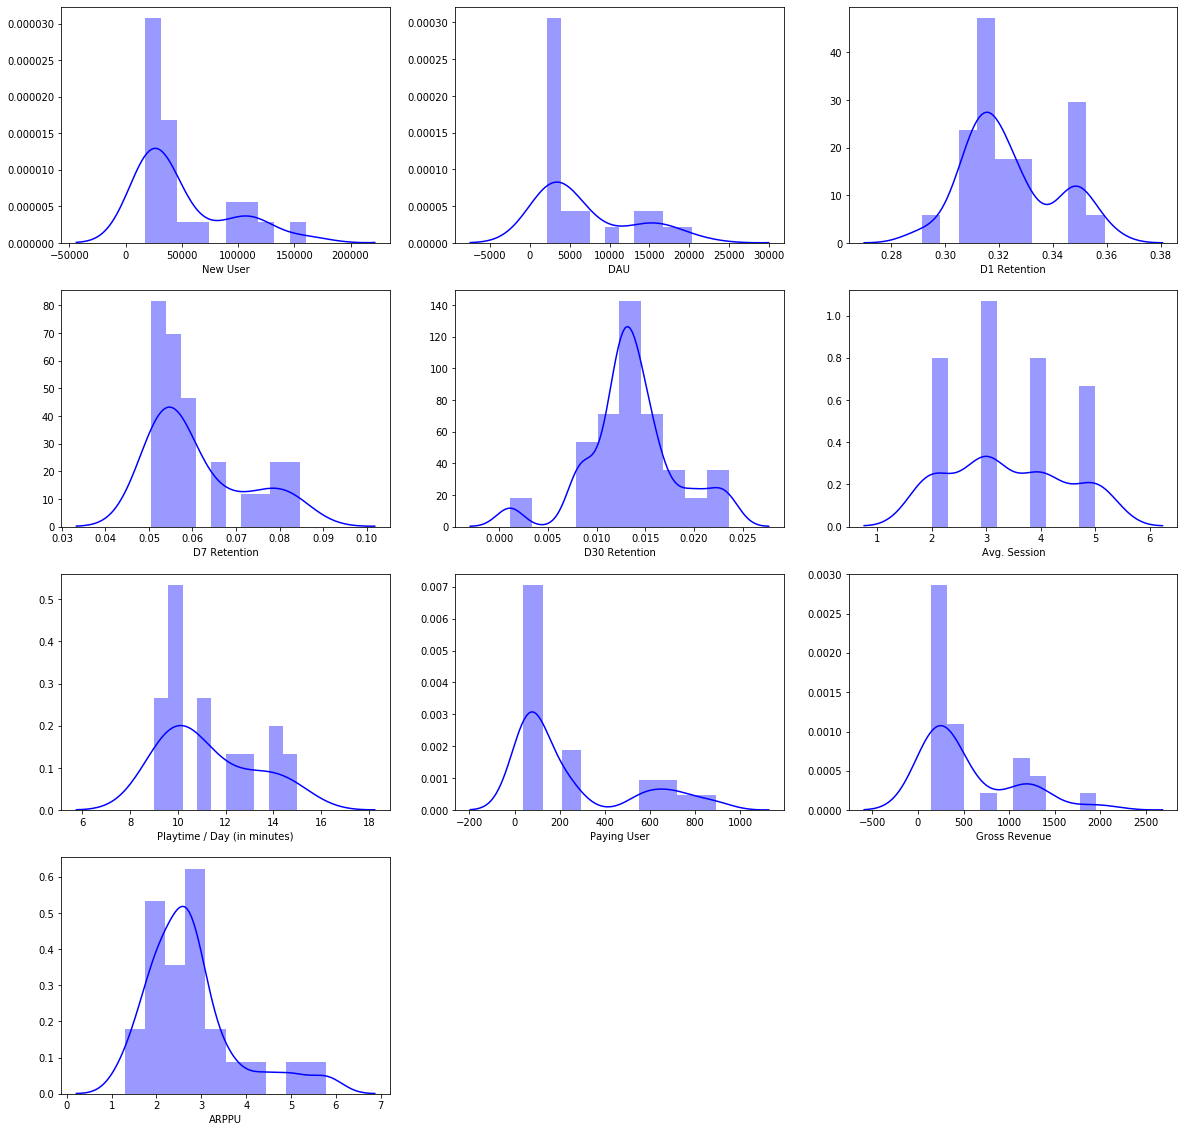

In [9]:
col = df.drop(['Date'],axis=1) # drop Date because it's irrelevant 
columnList = list(col)
columnList

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,11)):
    axes = fig.add_subplot(4,3,i)
    sns.distplot(df[j],bins=10,ax=axes, color='blue') # jumlah bins 1/10 jumlah data
plt.show()

In [10]:
col = df.drop(['Date'],axis=1) # drop Date because it's irrelevant 

list_skew = []
for i in col:
    list_skew.append(col[i].skew())

skewness = pd.DataFrame(data=list_skew, index=col.columns)
col_name = {'No':'KPI',0:'Skewness'}
skewness.rename(columns=col_name,inplace=True)
skewness

,Skewness
No,
New User,1.335368
DAU,1.129360
D1 Retention,0.523888
D7 Retention,1.020877
D30 Retention,-0.135260
Avg. Session,0.172513
Playtime / Day (in minutes),0.674177
Paying User,1.307053
Gross Revenue,1.402075


Dengan Ketentuan :
1. If skewness is less than −1 or greater than +1, the distribution is highly skewed.
2. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
3. If skewness is between −½ and +½, the distribution is approximately symmetric.

Dapat dilihat bahwa: 

1. D30 Retention, Avg.Session are approximately symmetric
2. New User, DAU, D7 Retention, Paying User, Gross Revenue, ARPPU, ARPDAU are highly skewed (positive skew)
3. D1 Retention, D30 Retention, Playtime / Day (in minutes), Conversion Rate are moderately skewed (positive skew)

## Boxplot

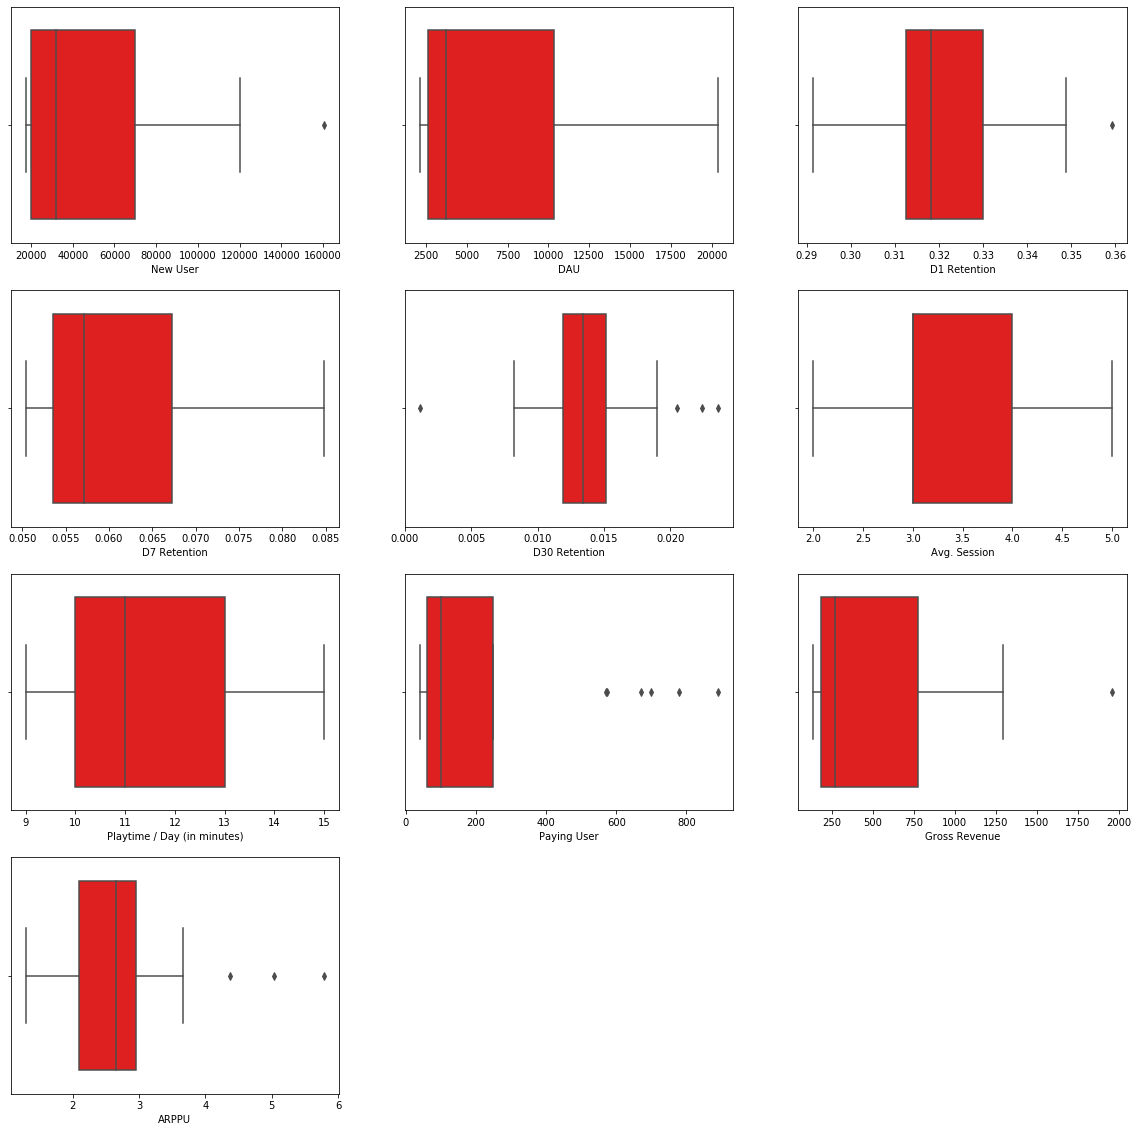

In [11]:
col = df.drop(['Date'],axis=1) # drop Date because it's irrelevant 
columnList = list(col)
columnList

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,11)):
    axes = fig.add_subplot(4,3,i)
    sns.boxplot(df[j],ax=axes, color='red') # jumlah bins 1/10 jumlah data
plt.show()

Dari diagram boxplot diatas terdapat beberapa outlier pada features New User, D1 Retention, D7 Retention, D30 Retention, Paying User, Gross Revenue, dan ARPPU<br>
Karena jumlah yang sedikit, proses Outlier Handling akan mengubah data secara signifikan oleh karenanya <b>tidak akan dilakukan</b> proses Outlier Handling 

## Analysis

Kolom yang menjadi target dalam analisis ini adalah <b>Gross Revenue</b>

## Bivariate Analysis

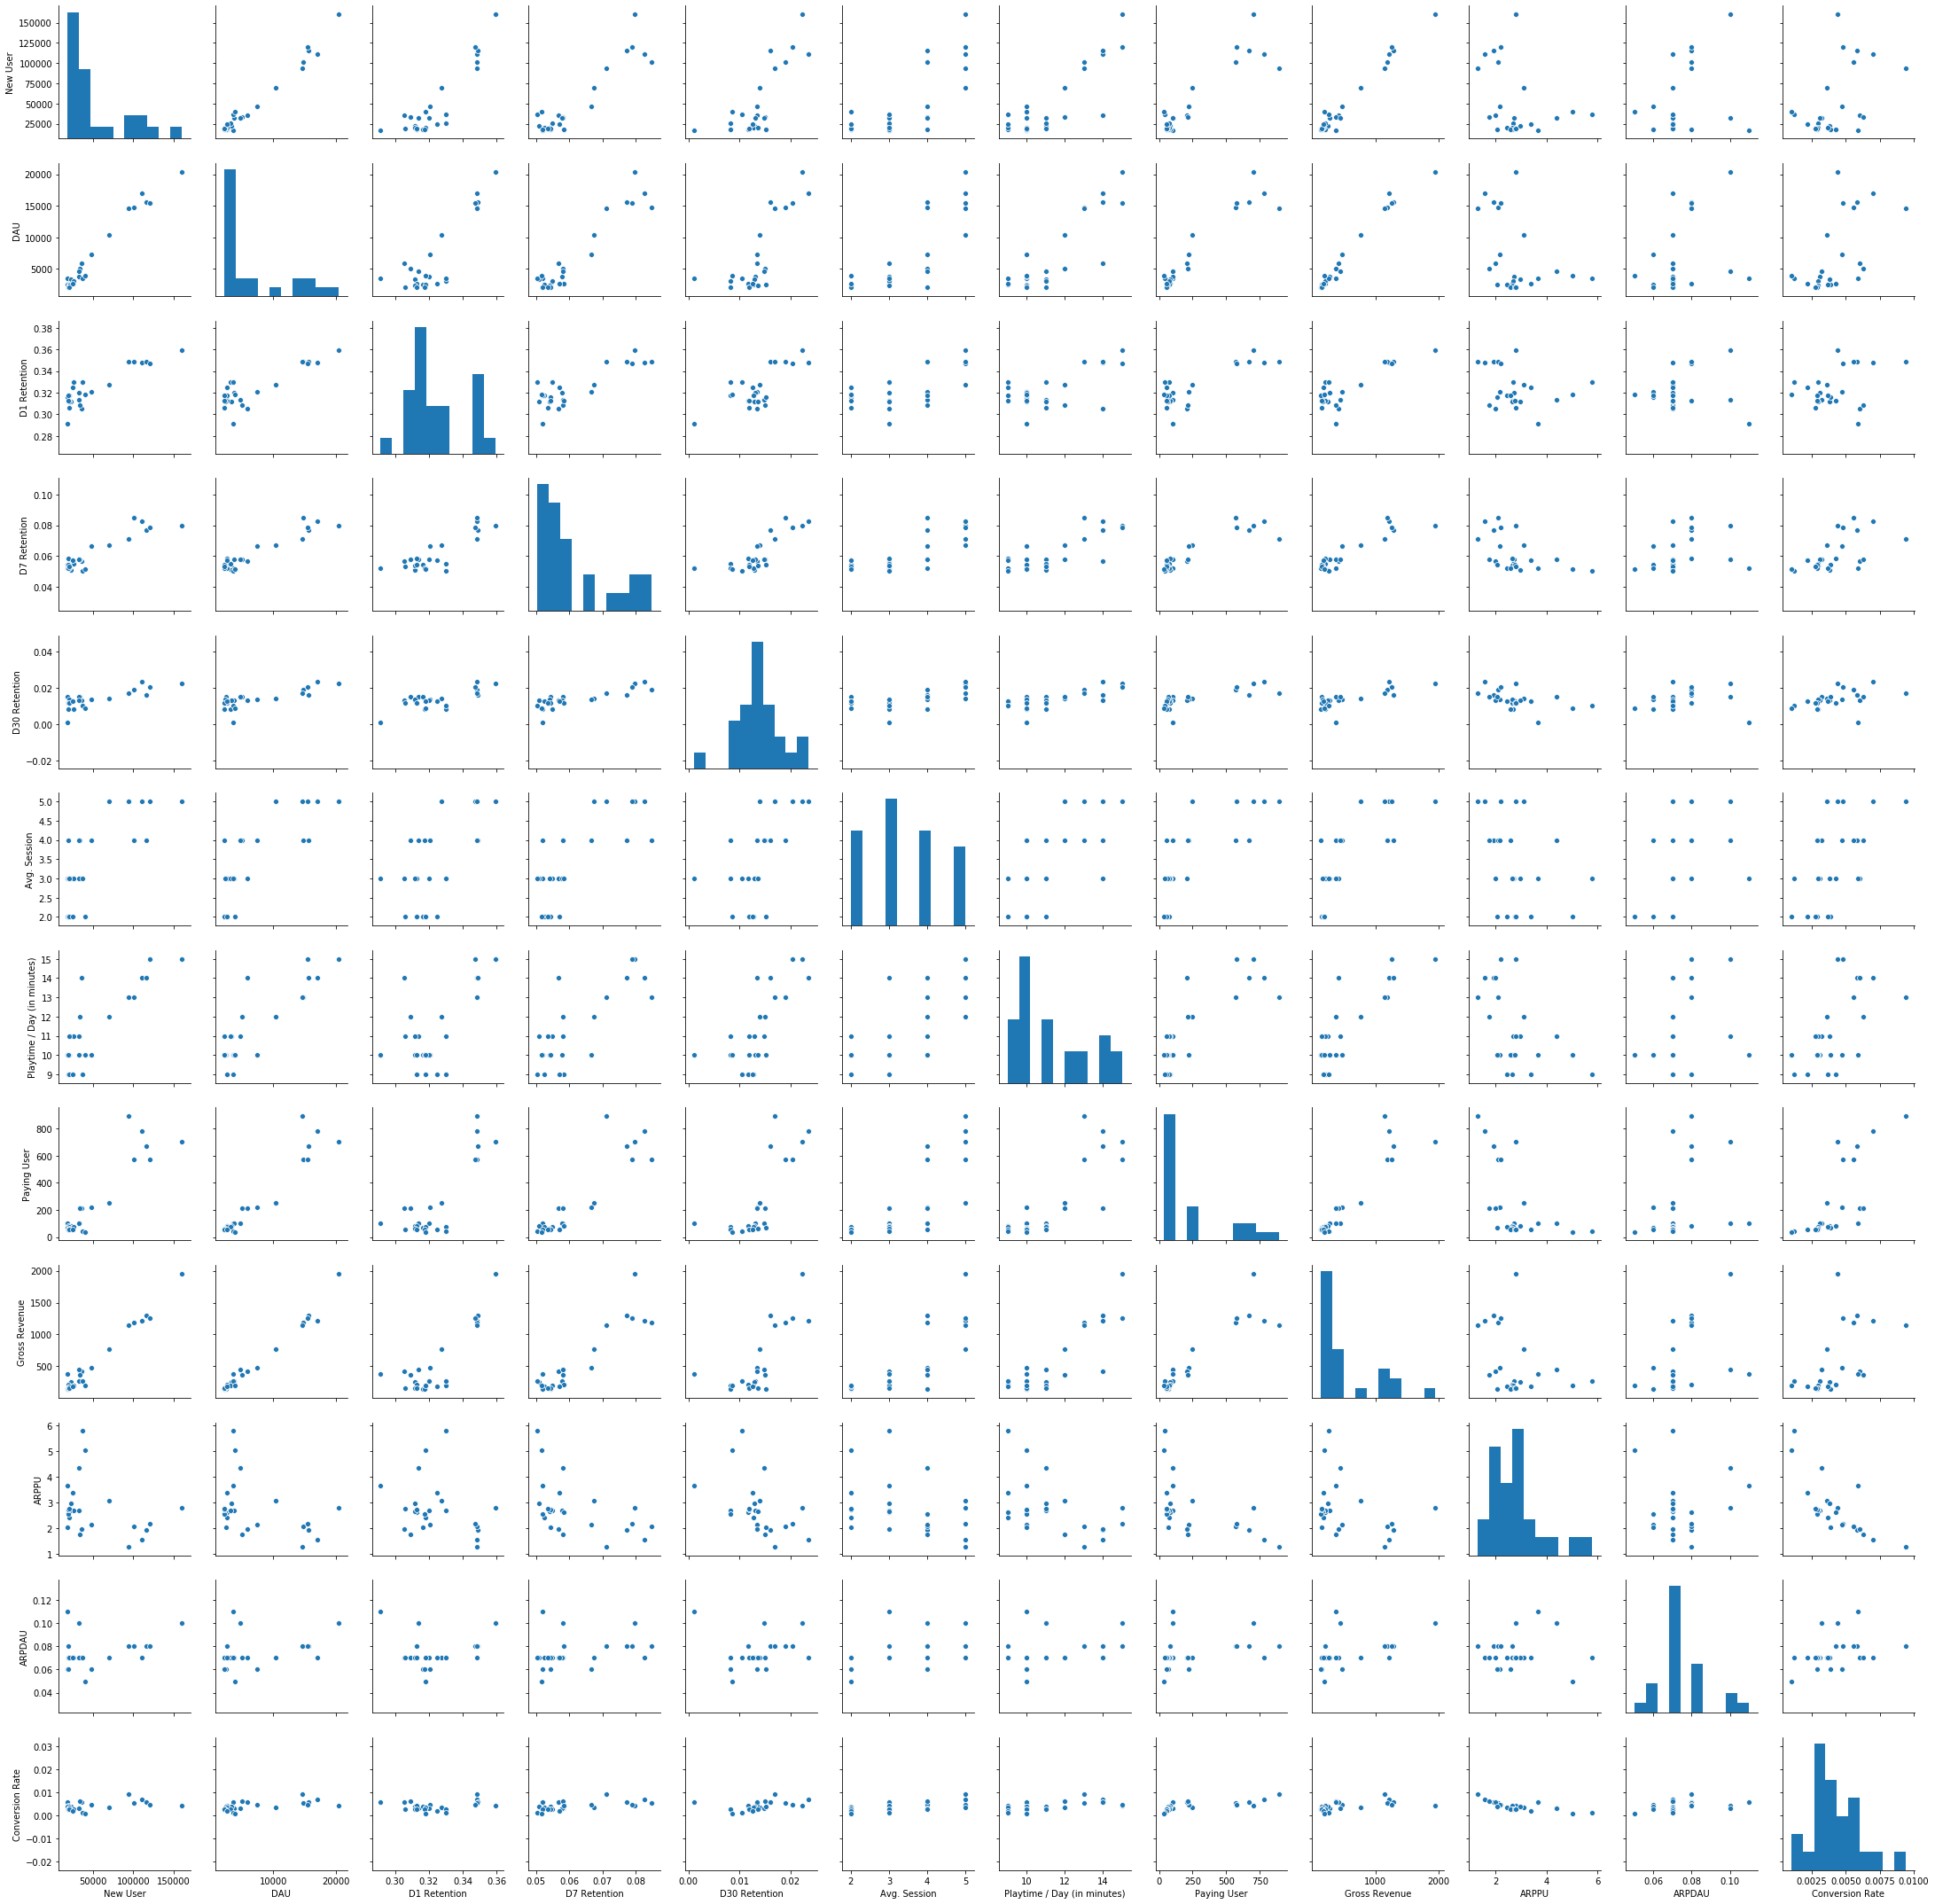

In [12]:
# Pairplot
sns.pairplot(df, palette='coolwarm')
plt.show()

(12, 0)

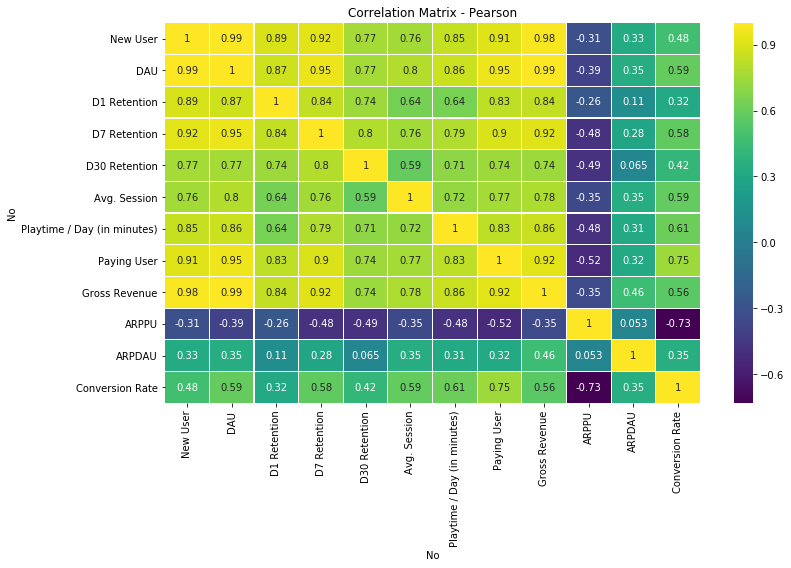

In [13]:
# Correlation Matrix - Pearson
col = df.drop(['Date'],axis=1) # drop Date because it's irrelevant 
col = col.astype('float64') # change type so i can use correlation matrix
corr = col.corr()

plt.figure(figsize=(12,7))
plt.title('Correlation Matrix - Pearson')
x = sns.heatmap(corr,annot=True,linewidths=0.2,cmap='viridis')
x.set_ylim(12,0)

Dapat dilihat bahwa 2 KPI yang paling mempengaruhi Gross Revenue adalah New User dan DAU<br>
Pada Pairplot dapat dilihat korelasi New User dan DAU memiliki _strength dan direction_ yang sama dengan Gross Revenue<br>
Pada Matrix Correlation - Pearson dapat dilihat nilai korelasi yang diperoleh<br>

Feature New User memiliki korelasi positif sebesar 0.98 terhadap target<br>
Feature DAU memiliki korelasi positif sebesar 0.99 terhadap target<br>

D7 Retention dan Paying User memiliki korelasi positif yang cukup terhadap target sebesar 0.92<br>

Walaupun demikian korelasi bukan berarti akibat (causation) sehingga diperlukan analisis lebih mendalam terhadap kedua feature ini

## Univariate Analysis

<b>Gross Revenue vs New User</b>

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


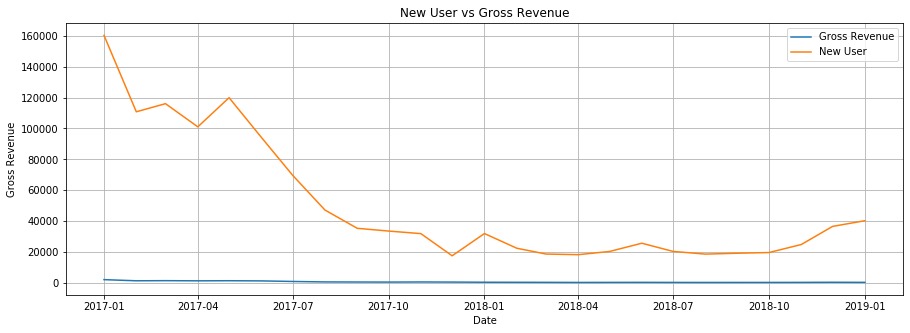

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Gross Revenue'],df['Date'],df['New User'])
plt.title('New User vs Gross Revenue')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.legend(["Gross Revenue",'New User'])
plt.show()

Dari grafik diatas tidak dapat ditarik kesimpulan yang jelas karena satuan data yang berbeda (gross revenue menggunakan satuan dolar dan new user menggunakan satuan jumlah) oleh karena itu diperlukan <b>proses scaling</b> agar data dapat dikomparasi secara numerik. Proses scaling yang dipilih adalah <b>Robust Scaler</b> yang umum digunakan pada preprocessing Machine Learning.

In [15]:
from sklearn.preprocessing import RobustScaler # importing package for scaling

In [16]:
# Scaling
# Drop all columns except New User, DAU, and Gross Revenue
scaler = RobustScaler()
robust = df.drop(['Date','D1 Retention','D7 Retention','D30 Retention','Avg. Session','Playtime / Day (in minutes)','Paying User','ARPPU','ARPDAU','Conversion Rate'],axis=1)
df2 = scaler.fit_transform(robust)

In [17]:
df2
# kolom 1 adalah New User 
# kolom 2 adalah DAU
# kolom 3 adalah Gross Revenue

array([[ 2.60188240e+00,  2.15074337e+00,  2.85756918e+00],
       [ 1.59848194e+00,  1.71712993e+00,  1.60441536e+00],
       [ 1.70511082e+00,  1.53665158e+00,  1.73631647e+00],
       [ 1.40087036e+00,  1.41732385e+00,  1.56004137e+00],
       [ 1.78340249e+00,  1.51997414e+00,  1.67108654e+00],
       [ 1.26224066e+00,  1.40814480e+00,  1.48368828e+00],
       [ 7.64639207e-01,  8.55462185e-01,  8.52414542e-01],
       [ 3.08349357e-01,  4.66451196e-01,  3.42986978e-01],
       [ 6.85962959e-02,  2.75113122e-01,  2.46574878e-01],
       [ 3.27092400e-02,  1.61344538e-01,  1.66881443e-01],
       [-9.71561583e-04,  1.17388494e-01,  2.98256918e-01],
       [-2.91934015e-01, -2.59857789e-02,  1.77580711e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.92672806e-01, -5.59793148e-02, -3.60824742e-02],
       [-2.69061836e-01, -1.43632838e-01, -1.00922409e-01],
       [-2.77401073e-01, -1.64835165e-01, -2.16037032e-01],
       [-2.35360793e-01, -1.53199741e-01

In [18]:
array_a = [] # New User 
for i in range(len(df2)):
    array_a.append(df2[i][0])
    
array_b = [] # DAU
for i in range(len(df2)):
    array_b.append(df2[i][1])
    
array_c = [] # Gross Revenue
for i in range(len(df2)):
    array_c.append(df2[i][2])

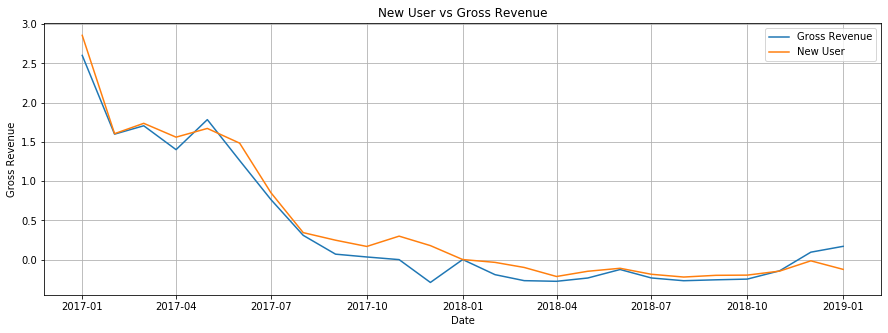

In [19]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],array_a,df['Date'],array_c)
plt.title('New User vs Gross Revenue')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.legend(["Gross Revenue",'New User'])
plt.show()

Dari grafik diatas dapat dilihat bahwa terdapat gap antara New User dan Gross Revenue di antara bulan Oktober-17 sampai Januari-18. Selain itu dapat diihat juga jumlah new user yang berkurang secara signifikan dari rentang waktu Mei-17 sampai September-17.

<b>Gross Revenue vs DAU</b>

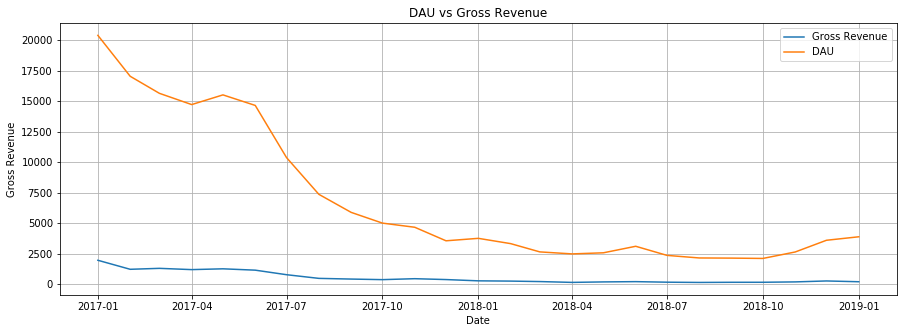

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Gross Revenue'],df['Date'],df['DAU'])
plt.title('DAU vs Gross Revenue')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.legend(["Gross Revenue",'DAU'])
plt.show()

Hal yang sama terjadi pada DAU dan Gross Revenue dimana tidak dapat dilakukan komparasi karena satuan yang berbeda, sehingga harus dilakukan proses scaling seperti pada New User vs Gross Revenue

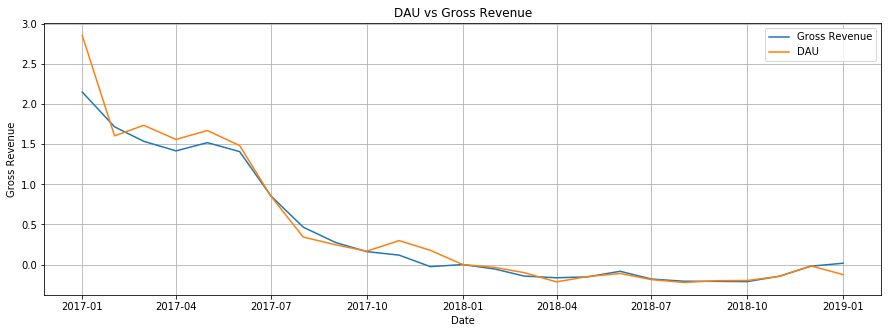

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],array_b,df['Date'],array_c)
plt.title('DAU vs Gross Revenue')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.legend(["Gross Revenue",'DAU'])
plt.show()

Dari grafik diatas dapat dilihat bahwa terdapat gap antara DAU dan Gross Revenue di antara bulan Oktober-17 sampai Januari-18. Selain itu dapat diihat juga jumlah DAU yang berkurang secara signifikan dari rentang waktu Mei-17 sampai September-17. Hal ini mirip dengan yang ditemukan pada New User sehingga dapat disimpulkan terdapat masalah yaitu berkurangnya New User dan DAU pada rentang waktu Mei 2017 sampai September 2017, yang mana hal ini dapat berhubungan dengan updates, funnel, ataupun marketing game.

Terdapat 2 masalah yaitu dari rentang waktu : <br>
Mei 2017 - September 2017 -> Penurunan tajam baik dari New User ataupun DAU<br>
Oktober 2017 - Januari 2018 -> Gap antara revenue dan data New User ataupun DAU<br>

Oleh karena itu data akan dikomparasi dengan data lainnya yang disediakan yaitu User Acquisition, Funnel, dan Development Log Data

## Comparing with User Acquisition Data

In [22]:
df_aq # user acquisition data

,Month,User Acquisition Media,Result
0,2017-01-01,"Banner, Video",80201
1,2017-03-01,Video,69658
2,2017-06-01,"Banner, Video",47109
3,2017-10-01,"Banner, Carrousel",10042
4,2017-11-01,"Banner, Carrousel",19085
5,2017-12-01,"Banner, Carrousel",13946
6,2018-02-01,Banner,4467
7,2018-07-01,Banner,6078
8,2018-08-01,Video,8333
9,2018-09-01,Banner,5729


In [23]:
df_aq['Month'] = df_aq['Month'].dt.strftime('%m/%d/%Y') # formatting date

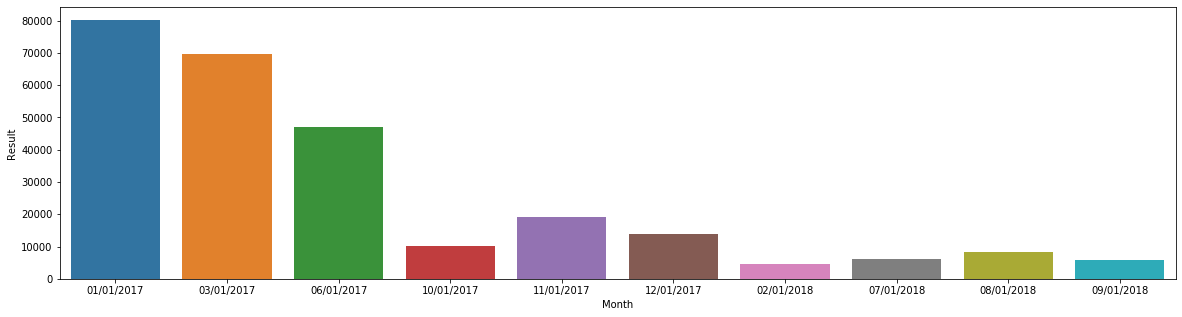

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(df_aq['Month'],df_aq['Result'])
plt.show()

Data diatas <b>hanya berhubungan dengan data pemain berbayar</b> (paying user) oleh karena itu akan dibandingkan dengan data paid user

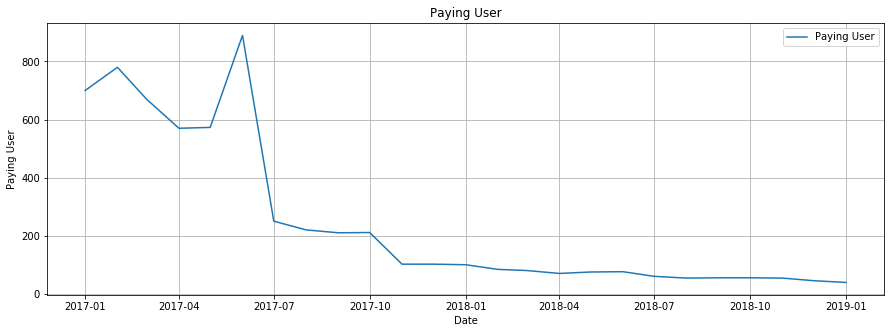

In [25]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Paying User'])
plt.title('Paying User')
plt.xlabel('Date')
plt.ylabel('Paying User')
plt.grid(True)
plt.legend(["Paying User"])
plt.show()

Paying User berkurang secara drastis semenjak bulan Mei 2017 dan kembali berkurang secara signifikan pada Oktober 2017. <br>
Apabila dibandingkan dengan User Acquisition Data, pada bulan April dan Mei tidak terdapat kegiatan oleh divisi marketing untuk menarik paying user. <br>
Hal ini terulang kembali pada Juli, Agustus dan September dimana tidak terdapat kegiatan menarik paying user. <br>
Paying User sendiri memiliki peran besar dalam Gross Revenue, dengan tingkat korelasi 0.92 dengan menggunakan Pearson Correlation.<br>
Gap yang timbul pada Oktober 2017 - Januari 2018 untuk Gross Revenue dan New User terjadi karena pada masa inilah terjadi penurunan paid user yang tajam. <br>
Dari data diatas dapat disimpulkan, dibutuhkan kegiatan marketing yang konsisten agar diperoleh peningkatan paying user

## Comparing with Funnel Data

![](Funnel.png)

Funnel sangat berpengaruh terhadap New User ataupun DAU <br>
Pada 2018, churn rate player setelah splash screen memiliki angka yang buruk yaitu 66,67%

## Comparing with Development Log Data

![](Development.png)

Penurunan new user dan DAU pada bulan Mei 2017 sampai September 2017 berkaitan dengan Dev Log Data, dimana selama 3 bulan tidak ada event atau implementasi baru di dalam game.

# Result

1. What do you think is 2 most Important KP's that Tim must know to increase Game X Revenue?

    Answer:
    1. New User (with Pearson Correlation get 0.98 score)
    2. Daily Active User (with Pearson Correlation get 0.99 score)
    <br>


2. What do you think is the problem of Game X?

    Answer:
    1. Decreasing New User which result in decreasing revenue
    2. Decreasing DAU which result in decreasing revenue
    3. Decreasing Paying User which result in decreasing revenue
    4. Not routine marketing which result in decreasing paying user
    5. Not routine in-game event which result in decreasing players
    6. Splash screen issue which decrease churn rate for players
    
    
3. What suggestion you will give as data analyst to help Tim increase both Performance and Revenue?

    Answer:
    1. Targeting new user and DAU for better revenue, we can do:
        1. Fixing splash screen issue to make churn rate increase
        2. Routine in-game event especially on holiday (christmas, new year, etc.)
    2. Targeting paying user also contribute a lot for revenue, we can do:
        1. Routine marketing, like using video, banner, carousel etc. 
        2. Give in-game benefit for paid users 
   